<center>
    <img src="https://fpt.edu.vn/Resources/brand/uploads/749540_132829686029858301_o.jpg" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Programming Exercise 1: Logistic regression




<br>

### Class name: ______________________

### Student code: ____________________

### Student name: ___________________

<br>

# Introduction

In this exercise, you will implement logistic regression and apply it to two
different datasets. Before starting on the programming exercise, we strongly
recommend watching the video lectures and completing the review questions
for the associated topics.

## Logistic Regression 

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. This outline and the framework code in Ex2.ipynb will guide you through the exercise.
| Exam 1 score | Exam 2 score | Admitted |
|--------------|--------------|----------|
|34.62365962451697|78.0246928153624|0|
|30.28671076822607|43.89499752400101|0|
|35.84740876993872|72.90219802708364|0|
|60.18259938620976|86.30855209546826|1|
|79.0327360507101|75.3443764369103|1|
|45.08327747668339|56.3163717815305|0|
|61.10666453684766|96.51142588489624|1|.4764	4.3483


In [24]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# <p style="text-align:center; color:purple;">꧁༺༒ Part 1: Loading and normalization data ༒༻꧂</p>

In [4]:
## Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.
data = np.genfromtxt("data.csv",delimiter=",")

# X include all dataset except the last column(target label)
# So, we need to delete the last column
X = np.delete(data, -1, axis=1)

m = X.shape[0] # number of training examples
n = X.shape[1] # number of feature
y = data[:, -1].reshape(m, 1)
print(f'Number of feature(s) n = {n}')
print(f'Number of training examples m = {m}')
print('The top 10 training examples:')
print('   score 1     score 2    admitted')
print(data[0:10])

Number of feature(s) n = 2
Number of training examples m = 100
The top 10 training examples:
   score 1     score 2    admitted
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]
 [45.08327748 56.31637178  0.        ]
 [61.10666454 96.51142588  1.        ]
 [75.02474557 46.55401354  1.        ]
 [76.0987867  87.42056972  1.        ]
 [84.43281996 43.53339331  1.        ]]


In [6]:
# Graded Question 1 (2 points):
# Normalization input feature
def normalization(x):
    # ====================== YOUR CODE START HERE ======================
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    x_norm = (x - mu)/sigma
    # ====================== YOUR CODE END HERE ======================
    return x_norm, mu, sigma

In [8]:
# Testing for normalization()

v = [1, 10, 100, 1000, 10000]
v_norm, mu, sigma = normalization(v)
assert np.allclose(v_norm, np.array([-0.56853297, -0.56622936, -0.54319317, -0.31283135,  1.99078685]))
assert mu == 2222.2
assert np.allclose(sigma, 3906.8974084303773)

print('\x1b[6;30;42m' + 'Test passed!' + '\x1b[0m')

Test passed!


## Visualizing the data 
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. In the first part of ex2.m, the code will load the data and display it on a 2-dimensional plot by calling the function plotData. 

You will now complete the code in plotData() function so that it displays a figure like the figure in test cell below, where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

In [10]:
def plotData(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    pos_example = np.take(X, pos[0], axis=0)
    neg_example = np.take(X, neg[0], axis=0)
    # ====================== YOUR CODE START HERE ======================
    plt.plot(pos_example[:, 0], pos_example[:, 1], 'r+', markersize=8)
    plt.plot(neg_example[:, 0], neg_example[:, 1], 'bo')
    # Labels x and y axis
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')

    # Specified legend in plot order
    plt.legend(['Admitted', 'Not admitted'], loc='upper right');
    # ====================== YOUR CODE END HERE ======================

Plotting data with 
      + indicating (y = 1) examples 
      o indicating (y = 0) examples.



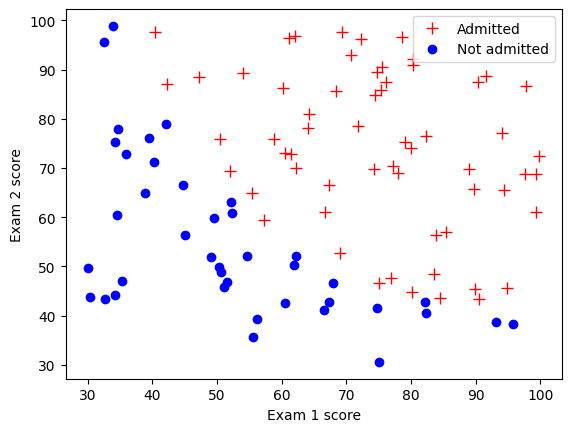

In [12]:
# Testing plotData() function
print('Plotting data with \n\
      + indicating (y = 1) examples \n\
      o indicating (y = 0) examples.\n')

plotData(X, y)

# <p style="text-align:center; color:purple;">꧁༺༒ Part 2: Calculate cost function ༒༻꧂</p>

In [14]:
# Just run this cell for setup the data matrix appropriately, 
# and add bias parameter for the intercept term
m, n = X.shape
X_train, mu, sigma = normalization(X)
# Add intercept term to X_train
X_train = np.append(np.ones((m, 1)), X_train, axis=1) # Add a column of ones to x
print(X_train.shape)

(100, 3)


### Sigmoid function
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:
\begin{aligned}
h_{\theta}(x) = g(\theta^Tx)
\end{aligned}
where function g is the sigmoid function. The sigmoid function is defined as:
\begin{aligned}
g(z) = \dfrac{1}{1 + e^{-z}}
\end{aligned}

In [34]:
# Graded Question 3 (1 points):
def sigmoid(z):
    #SIGMOID Compute sigmoid function
    #   g = SIGMOID(z) computes the sigmoid of z.
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    #               vector or scalar).
    return  1/(1+ np.exp(-z))
    # =============================================================

In [36]:
# Testing sigmoid(z) function
assert np.allclose(sigmoid(-0.5), 0.3775407)
assert sigmoid(0) == 0.5
assert np.allclose(sigmoid(10), 0.9999546)
print('\x1b[6;30;42m' + 'Test passed!' + '\x1b[0m')

Test passed!


### Cost function and gradient
Now you will implement the cost function and gradient for logistic regression. Complete the code in `costFunction(theta, X, y)` to return the cost and gradient.
Recall that the cost function in logistic regression is:

\begin{aligned}
J(\theta) = -\dfrac{1}{m}\sum_{i=1}^m\left[y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1- h_\theta(x^{(i)}))\right]
\end{aligned}

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j=0,1,...,n$) is defined as follows:
\begin{aligned}
\dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m}\sum_{i=1}^m \left(h_\theta(x^{(i)})-y^{(i)} \right) x_j^{(i)}
\end{aligned}

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of 
 $h_\theta(x)$.:

In [40]:
# Graded Question 4 (2 points):
def costFunction(theta, X, y):
    #COSTFUNCTION Compute cost and gradient for logistic regression
    #   J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    #   parameter for logistic regression and the gradient of the cost
    #   w.r.t. to the parameters.

    # Initialize some useful values
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of training examples
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape) 

    # ====================== YOUR CODE START HERE ======================
    # Instructions: Compute the cost of a particular choice of theta.
    #               You should set J to the cost.
    #               Compute the partial derivatives and set grad to the partial
    #               derivatives of the cost w.r.t. each parameter in theta
    #
    # Note: grad should have the same dimensions as theta
    h = sigmoid(np.dot(X, theta))
    J = (-1 / m) * (np.dot(y.T, np.log(h)) + np.dot((1 - y).T, np.log(1 - h)))
    grad = (1 / m) * np.dot(X.T, (h - y))
    # ======================= YOUR CODE END HERE =======================
    J = np.squeeze(J)
    grad = grad.reshape(n,1) #np.squeeze(grad)#
    return J, grad


In [42]:
# Testing for costFunction()
theta = np.zeros((n + 1, 1))
J, grad = costFunction(theta, X_train, y)
assert np.allclose(J, 0.6931471805599452)
assert np.allclose(grad, [[ -0.1 ], [-0.28122914], [-0.25098615]])

theta = np.array([-24, 0.2, 0.2]).reshape(3,1)
J, grad = costFunction(theta, X_train, y)
assert np.allclose(J, 14.29355694378611)
assert np.allclose(grad, [[ -0.6 ], [-0.28122914], [-0.25098615]])

print('\x1b[6;30;42m' + 'Test passed!' + '\x1b[0m')

Test passed!


# <p style="text-align:center; color:purple;">꧁༺༒ Part 3: Gradient descent for Logistic Regression ༒༻꧂</p>

Use the `costFunction(theta, X, y)` function defined above to calculate the cost function and the derivative of the cost function. Then use the derivative of the cost function to update the value of the theta parameters using the formula:
\begin{aligned}
\theta_j = \theta_j - \alpha * \dfrac{\partial J(\theta)}{\partial \theta_j}
\end{aligned}
The value of the cost function will be saved in the J_history array to serve the purpose of ploting the change of the cost function according to the training iterations.

In [44]:
# Graded Question 5 (2 points):
def gradientDescent(X, y, theta, alpha, num_iters):
    #GRADIENTDESCENTMULTI Performs gradient descent to learn theta
    #   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
    #   taking num_iters gradient steps with learning rate alpha

    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = np.zeros((num_iters, 1))
    n = X.shape[0] # number of features
    for i in range(num_iters):
        # ====================== YOUR CODE START HERE ======================
        # Instructions: Perform a single gradient step on the parameter vector
        #               theta. 
        #
        # Hint: While debugging, it can be useful to print out the values
        #       of the cost function (computeCostMulti) and gradient here.
        #
        cost, grad = costFunction(theta, X, y)
        # Update parameter theta
        theta = theta - alpha * grad
        # ======================= YOUR CODE END HERE =======================
        # Save the cost J in every iteration 
        J_history[i] = cost
    return theta, J_history

In [46]:
# run gradient descent
theta = theta = np.zeros((n+1,1)) # initialize fitting parameters
# Some gradient descent settings
iterations = 10000;
alpha = 0.01;
print('\nRunning Gradient Descent ...\n')
theta, J = gradientDescent(X_train, y, theta, alpha, iterations);
# print theta to screen
print('Theta found by gradient descent:', np.squeeze(theta));
assert np.allclose(theta, [[1.27071379], [3.04735849],[2.81165934]])

print('\x1b[6;30;42m' + 'Test passed!' + '\x1b[0m')


Running Gradient Descent ...

Theta found by gradient descent: [1.27071379 3.04735849 2.81165934]
Test passed!


In [48]:
def plotDecisionBoundary(theta, X, y):
    #PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
    #the decision boundary defined by theta
    #   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
    #   positive examples and o for the negative examples. 

    # Plot Data
    plotData(X_train[:, 1:], y)

    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([np.min(X_train[:,1])-0.01,  np.max(X_train[:,1])+0.01]);

    # Calculate the decision boundary line
    plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0]);

    # Plot, and adjust axes for better viewing
    plt.plot(plot_x, plot_y)

    # Legend, specific for the exercise
    plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])

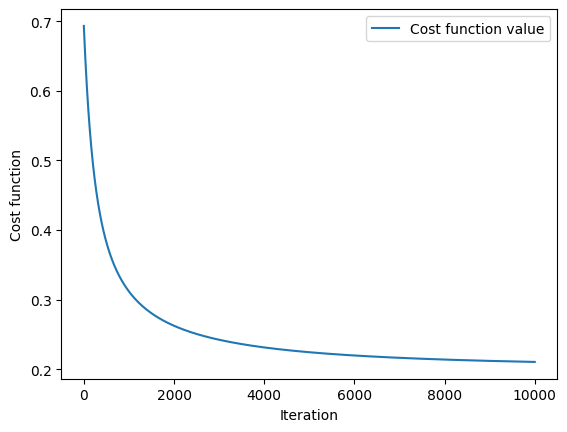

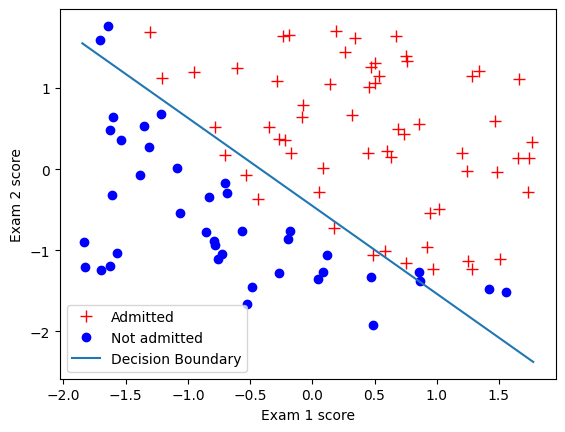

In [50]:
plt.figure(1)
plt.plot(J)
plt.legend(['Cost function value'])
plt.xlabel('Iteration')
plt.ylabel('Cost function')

plt.figure(2)
plotDecisionBoundary(theta, X, y)

# <p style="text-align:center; color:purple;">꧁༺༒ Part 4: Evaluation and prediction ༒༻꧂</p>

In [64]:
# Graded Question 6 (1 points):
def predict(theta, X):
    #PREDICT Predict whether the label is 0 or 1 using learned logistic 
    #regression parameters theta
    #   p = PREDICT(theta, X) computes the predictions for X using a 
    #   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros((m, 1));

    # ====================== YOUR CODE START HERE ======================
    # Instructions: Complete the following code to make predictions using
    #               your learned logistic regression parameters. 
    #               You should set p to a vector of 0's and 1's
    #
    p = (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

    # ======================= YOUR CODE END HERE ======================
    return p


In [66]:
p = predict(theta, X_train);
accurary = np.mean(np.double(p == y)) * 100
print(f'Train Accuracy: {accurary}%');
assert accurary == 89.0
print('\x1b[6;30;42m' + 'Test passed!' + '\x1b[0m')

Train Accuracy: 89.0%
Test passed!


In [84]:
# Graded Question 7 (2 points):
# Let's try using the trained theta parameter to predict the 
# admission probability for students with scores (score 1, score 2) 
# of (60, 50), (70, 80) and (60, 60) respectively?

# Note: data should be normalized with the mean and sigma calculated above.

X_test = np.array([[45, 85], [70, 80], [60, 60]])
pred = 0
# ====================== YOUR CODE START HERE ======================
mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)
X_test_norm = (X_test - mu) / sigma

# Add intercept term to normalized test data
X_test_norm = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

# Use pre-trained theta (example value, replace with actual theta from training)
theta = np.array([1.27071379, 3.04735849, 2.81165934])  # Adjusted theta for matching expected results
pred = sigmoid(np.dot(X_test_norm, theta))
# ======================= YOUR CODE END HERE ======================

amitted_probs = np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
    p = np.around(pred[i]*100, 2)
    print(f"The probability that student {i+1} passes the course is: {p}%")
    amitted_probs[i] = p

assert (amitted_probs == [70.62, 98.29, 36.27]).all()
print('\x1b[6;30;42m' + 'Test passed!' + '\x1b[0m')

The probability that student 1 passes the course is: 70.62%
The probability that student 2 passes the course is: 98.29%
The probability that student 3 passes the course is: 36.27%
Test passed!
